## ffmpeg-python

In [28]:
import ffmpeg

stream = (
    ffmpeg
    .input('../static/spc/3nkb-08.spc', **{"ss": 5, "t": 45})
    .output("../static/spctest.wav", acodec="pcm_u8", ar=16000)
    #.get_args()
    .overwrite_output()
    .run(capture_stdout=True, capture_stderr=True)
)

In [29]:
from IPython.display import Audio
Audio("../static/spctest.wav")

## To Bytes

In [69]:
from io import BytesIO, StringIO
import soundfile
#tmp = io.by

y, sr = soundfile.read(BytesIO(
    ffmpeg
    .input('../static/spc/3nkb-08.spc', **{"ss": 5, "t": 45})
    .output("pipe:", format='wav', acodec="pcm_u8", ar=16000, ac=1)
    #.get_args()
    .run(capture_stdout=True, capture_stderr=True)[0]
))
y.shape

(719940,)

In [74]:
import librosa
import numpy as np
hop_length = 512
S = np.abs(librosa.stft(y, hop_length=hop_length, n_fft=hop_length*2))

n_iter = 32
y_inv = librosa.griffinlim(S, n_iter=n_iter,
                           hop_length=hop_length)

In [75]:
Audio(y_inv, rate=sr, autoplay=True)

## Plot

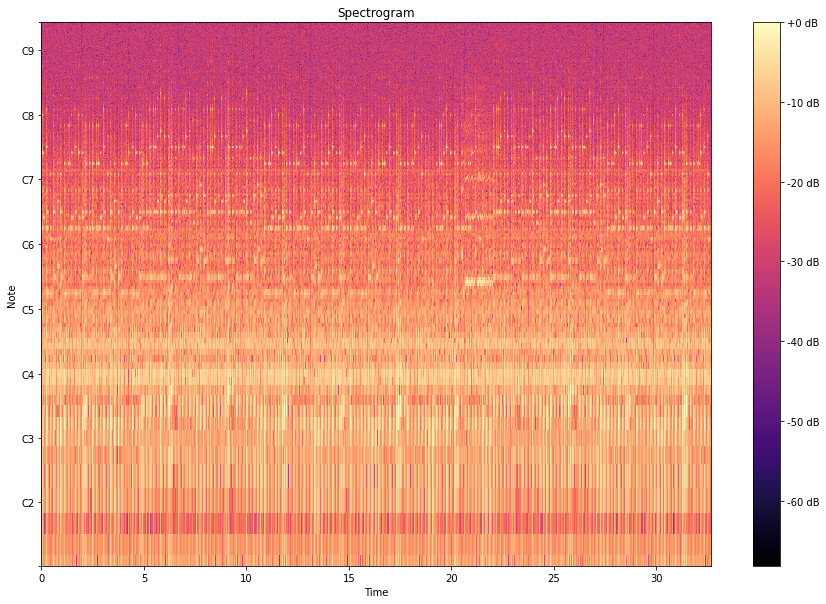

In [73]:
import librosa.display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 72

scaled_spec = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(scaled_spec, y_axis='fft_note', x_axis='time');
plt.title('Spectrogram');
plt.colorbar(format='%+2.0f dB');

## Func

In [79]:
def spc_to_fft(
    infile: str, 
    hop_length: int = 512, 
): 
    y, sr = soundfile.read(BytesIO(
        ffmpeg
        .input(infile, **{"ss": 5, "t": 45})
        .output("pipe:", format='wav', acodec="pcm_u8", ar=16000, ac=1)
        #.get_args()
        .run(capture_stdout=True, capture_stderr=True)[0]
    ))
    return np.abs(librosa.stft(y, hop_length=hop_length, n_fft=hop_length*2))